In [3]:
import json
import numpy as np
from PIL import Image
from pathlib import Path
from collections import Counter
from hazm import word_tokenize, sent_tokenize, Normalizer
from wordcloud import WordCloud
import arabic_reshaper
from bidi.algorithm import get_display

### Load JSON data

In [4]:
with open('src/data/CS-Stack.json') as f:
    data = json.load(f)

In [5]:
message = iter(data['messages'])

In [6]:
next(message)

{'id': 1,
 'type': 'service',
 'date': '2021-07-06T00:16:27',
 'actor': 'CS Stackoverflow [IRAN]',
 'actor_id': 'channel1564092519',
 'action': 'migrate_from_group',
 'title': 'CS Stackoverflow [IRAN]',
 'text': ''}

### Load and normalize stopwords

In [162]:
def load_stopwords(file_path: str):
    """
    This function get a directory of stop words file with .txt extension, 
    then load, readlines and normalize stopwords.
    """
    # load
    stopwords = open(file_path).readlines()
    
    # remove '\n'
    stopwords = list(map(str.strip, stopwords)) 
    
    # normalize stop words
    normalizer = Normalizer()
    stopwords = list(map(normalizer.normalize, stopwords))
    
    return stopwords

In [165]:
load_stopwords('src/data/stopwords.txt')[:10]

['و', 'در', 'به', 'از', 'که', 'می', 'این', 'است', 'را', 'با']

### Stopwords detection

In [169]:
def stopwords_detection(text: str, stopwords_file_path: str):
    """
    This function takes a text-string argument,
    tokenize text, remove stop words and returns a list of text words.
    """
    stopwords = load_stopwords(stopwords_file_path)
    tokens = word_tokenize(text)
    return list(filter(lambda item: item not in stopwords, tokens))

In [171]:
stopwords_detection(
    text='سلام من امیر محمد یمینی هستم. اما اگر بخواهید من را بدنام کنید، مجبورم فایل نصبی را تغییر دهم.',
    stopwords_file_path='src/data/stopwords.txt'
)

['سلام',
 'امیر',
 'محمد',
 'یمینی',
 'هستم',
 'بخواهید',
 'بدنام',
 'مجبورم',
 'فایل',
 'نصبی',
 'تغییر',
 'دهم']

### Parse text from json file

In [178]:
def parse_json(json_file_path: str, stopwords_file_path: str):
    """
    This function takes a telegram chat json file, returns text content without stopwords.
    """
    
    with open(json_file_path) as f:
        data = json.load(f)
         
    text_str = ''
    text_list = ''
    message = data['messages']

    for msg in message:

        # string text messages
        if isinstance(msg['text'], str):
            msgs = stopwords_detection(msg['text'], stopwords_file_path)
            text_str += f" {' '.join(msgs)}"
            
        # list text messages
        elif isinstance(msg['text'], list):
            for i in msg['text']:
                if isinstance(i, str):
                    msgs = stopwords_detection(i, stopwords_file_path)
                    text_list += f" {' '.join(msgs)}"
                else:
                    pass

    text_content = text_str + ' ' + text_list
    return text_content

In [177]:
parse_json(
    json_file_path='src/data/CS-Stack.json', 
    stopwords_file_path='src/data/stopwords.txt'
)

'  سلام دوستان پیش\u200cزمینه\u200cهای یادگیری پایتون کدنویسی کلا چیه صرفا کلیدواژه می\u200cخوام بتونم سرچ ممنونم از'

### Make a word cloud

In [189]:
text_content = parse_json(
    json_file_path='src/data/CS-Stack.json', 
    stopwords_file_path='src/data/stopwords.txt'
)

text_norm = normalizer.normalize(text_content)
Counter(word_tokenize(normalizer.normalize(text_content))).most_common()[:10]

[('نصب', 1361),
 ('سلام', 997),
 ('دوستان', 797),
 ('الان', 671),
 ('ممنون', 587),
 ('باز', 573),
 ('کار', 527),
 ('ثبت', 513),
 ('مشکل', 445),
 ('کلاس', 428)]

In [223]:
text = arabic_reshaper.reshape(text_norm[:500000])
text = get_display(text)

In [210]:
# def reshaper(text: str):
#     """
#     This function tries to reshape text and display it in three iteration.
#     if "arabic.reshaper" can't handle vloume of text, each iteration will decrease 30% of text.
#     """
#     try:
#         text = arabic_reshaper.reshape(text)
#         text = get_display(text)
#         print(len(text))
#         return text
#     except:
#         # try:
#         # len_text = len(text)
#         # decrease_amount = len_text*(0.3)

#         new_len = int(len(text) - (0.3*len(text)))
#         text = text[:new_len]
#         text = arabic_reshaper.reshape(text)
#         text = get_display(text)
#         print(len(text))
#         return text
# #         except:
# #             try:
# #                 len_text = len(text)
# #                 decrease_amount = len_text*(6/10)

# #                 new_len = int(len_text - decrease_amount)
# #                 text = text[:new_len]
# #                 text = arabic_reshaper.reshape(text)
# #                 text = get_display(text)
# #                 print(len(text))
# #                 return text
# #             except:
# #                 try:
# #                     len_text = len(text)
# #                     decrease_amount = len_text*(8/10)

# #                     new_len = int(len_text - decrease_amount)
# #                     text = text[:new_len]
# #                     text = arabic_reshaper.reshape(text)
# #                     text = get_display(text)
# #                     print(len(text))
# #                     return text
# #                 except Exception as e:
# #                     return e

In [211]:
# for i in range(5):
#     len_text = len(text_norm)
#     decrease_amount = len_text*(i/10)

#     new_len = int(len_text - decrease_amount)
#     text = text_norm[:new_len]

#     print(f"len_text: {len_text}")
#     print(f"decreade amount: {decrease_amount}")
#     print(f"new_len: {len(text)}")
#     print("-"*40)

In [235]:
alice_mask = np.array(Image.open('src/data/python_logo.png'))

(-0.5, 799.5, 399.5, -0.5)

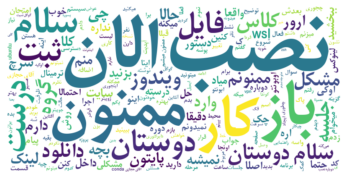

In [232]:
wordcloud = WordCloud(
    font_path='src/data/Mitra_Bold.ttf',
    width=800,
    height=400,
    background_color='white'
).generate(text)

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [24]:
with open('src/data/text.txt') as f:
    text = f.readlines()

In [29]:
text_c = ''
for i in text:
    text_c += i

In [33]:
Counter(text_c.split()).most_common()

[('در', 11),
 ('و', 11),
 ('به', 10),
 ('این', 7),
 ('برزیل', 6),
 ('تیم', 5),
 ('فوتبال', 5),
 ('ساحلی', 5),
 ('جام', 5),
 ('با', 5),
 ('ایران', 5),
 ('ملی', 4),
 ('کشورمان', 4),
 ('دیدار', 4),
 ('2', 4),
 ('رقابت\u200cها', 4),
 ('فینال', 3),
 ('بین\u200cقاره\u200cای', 3),
 ('شد', 3),
 ('از', 3),
 ('مسابقات', 3),
 ('دست', 3),
 ('رقابت\u200cهای', 3),
 ('که', 3),
 ('بر', 3),
 ('یک', 3),
 ('را', 3),
 ('ثمر', 3),
 ('سرمربی', 3),
 ('قهرمانی', 2),
 ('ساعت', 2),
 ('2022', 2),
 ('امارات', 2),
 ('پایان', 2),
 ('نتیجه', 2),
 ('رسید.', 2),
 ('گل', 2),
 ('دو', 2),
 ('وقت', 2),
 ('سوم', 2),
 ('ـ', 2),
 ('شکست', 2),
 ('عنوان', 2),
 ('خود', 2),
 ('4', 2),
 ('موفق', 1),
 ('برتری', 1),
 ('مقابل', 1),
 ('دوره', 1),
 ('پیدا', 1),
 ('کند.', 1),
 ('گزارش', 1),
 ('خبرگزاری', 1),
 ('تسنیم،', 1),
 ('19:30', 1),
 ('امشب', 1),
 ('(یکشنبه)،', 1),
 ('مرحله', 1),
 ('مصاف', 1),
 ('رفت', 1),
 ('پیروزی', 1),
 ('گل\u200cهای', 1),
 ('ساحلی\u200cبازان', 1),
 ('محمد', 1),
 ('احمدزاده', 1),
 ('سعید', 1),
 ('پیرامون', 1),